# Applying Apriori algorithm and some frequency visualization

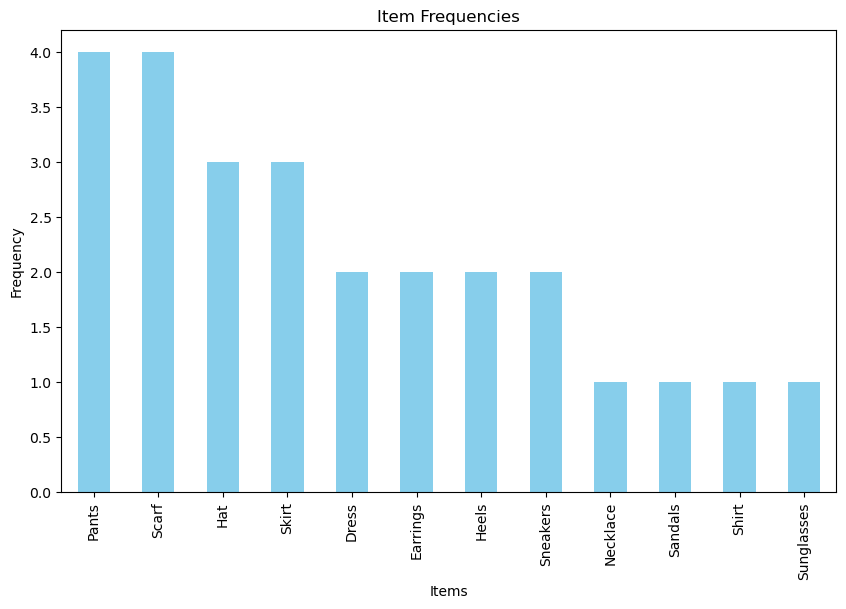

          antecedents               consequents  antecedent support  \
0             (Heels)                   (Dress)                 0.4   
1             (Dress)                   (Heels)                 0.4   
2             (Scarf)                   (Dress)                 0.8   
3             (Dress)                   (Scarf)                 0.4   
4             (Scarf)                (Earrings)                 0.8   
..                ...                       ...                 ...   
61  (Pants, Sneakers)              (Hat, Skirt)                 0.4   
62              (Hat)  (Skirt, Pants, Sneakers)                 0.6   
63            (Skirt)    (Hat, Pants, Sneakers)                 0.6   
64            (Pants)    (Hat, Skirt, Sneakers)                 0.8   
65         (Sneakers)       (Hat, Skirt, Pants)                 0.4   

    consequent support  support  confidence      lift  leverage  conviction  \
0                  0.4      0.4    1.000000  2.500000      0.24     

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Given dataset
dataset = [
    ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
    ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']
]

# Convert the dataset to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Calculate item frequencies
item_frequencies = df.sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
item_frequencies.plot(kind='bar', color='skyblue')
plt.title('Item Frequencies')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

# Find frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the association rules
print(rules)


# Let's do the same but with a bigger dataset

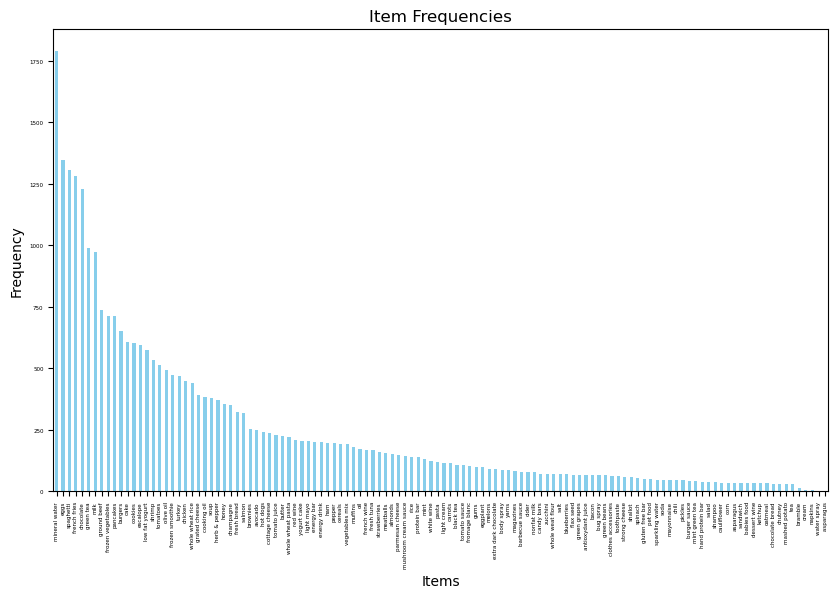

      support                                 itemsets
0    0.020397                                (almonds)
1    0.033329                                (avocado)
2    0.010799                         (barbecue sauce)
3    0.014265                              (black tea)
4    0.011465                             (body spray)
..        ...                                      ...
252  0.011065       (ground beef, milk, mineral water)
253  0.017064  (ground beef, spaghetti, mineral water)
254  0.015731         (milk, spaghetti, mineral water)
255  0.010265    (spaghetti, olive oil, mineral water)
256  0.011465     (pancakes, spaghetti, mineral water)

[257 rows x 2 columns]
                    antecedents                 consequents  \
0               (mineral water)                   (avocado)   
1                     (avocado)             (mineral water)   
2                     (burgers)                      (cake)   
3                        (cake)                   (burgers)   
4

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import csv


# Initialize a CSV reader
file_path = r"C:\Users\abdel\Downloads\Market_Basket_Optimisation.csv"

with open(file_path, 'r') as file:
    reader = csv.reader(file)
    dataset = [row for row in reader]
 
# Convert the dataset to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Calculate item frequencies
item_frequencies = df.sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = item_frequencies.plot(kind='bar', color='skyblue', fontsize=4)
bar_plot.set_title('Item Frequencies')
bar_plot.set_xlabel('Items')
bar_plot.set_ylabel('Frequency')
plt.show()

# Find frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the association rules
print(rules)
